In [1]:
from sympy import *
import toolkit as tk
init_printing()
t, tau, w = symbols('t tau omega', real=True)
s = symbols('s')
j = I

In [3]:
tk.fixH((Heaviside(t)**3))

In [7]:
tk.fixH(integrate(Heaviside(t-tau)*tau*Heaviside(tau),(tau,0,t)).simplify())

In [36]:
f = 50
j = I
w = 2*pi*f
L1 = 10e-3
C1 = 1e-6

Z1 = j*w*L1
Z2 = 1/(j*w*C1)
Z1.evalf(),Z2.evalf()

In [37]:
R1 = 1e3
R2 = 1e3
R3 = 1e3
Z = R1 + R2*Z1/(R2+Z1) + R3*Z2/(R3+Z2)
Z.simplify().evalf()

In [38]:
V1 = 1
VC1 = R3*Z2/(R3+Z2)*V1/Z
abs(VC1.simplify().evalf())

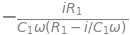

In [51]:
R1,R2,C1,w = symbols('R1 R2 C1 omega', positive=True)

ZC = 1/(j*w*C1)
Z_par = (R1*ZC/(R1+ZC))
Z_par

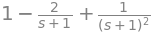

In [52]:
s = Symbol('s')
H = s**2/(s+1)**2
apart(H)

In [53]:
P = (s+4)**2+3**2
solve(P,s)

In [65]:
H = s**2/P
inverse_laplace_transform(apart(H/s),s,t).collect(exp(-4*t))

In [68]:
h = 2*DiracDelta(t) - 4*exp(-2*t)*Heaviside(t)
laplace_transform(h,t,s)[0].simplify()

In [71]:
H = s/((s+1)*(s+2))
inverse_laplace_transform(H,s,t)

In [77]:
P = s**2+8*s+25
wc = sqrt(P.subs(s,0))
damp = P.coeff(s,1)/(2*wc)
damp

In [82]:
P = ((s+3)**2+4**2).expand()
wc = sqrt(P.subs(s,0))
damp = P.coeff(s,1)/(2*wc)
damp

In [86]:
p = -1+sqrt(3)*j
damp = cos(atan2(im(p),-re(p)))
damp

In [87]:
wd = im(p)
wn = wd/(sqrt(1-damp**2))
wn

In [89]:
H = wn**2/(s**2+2*damp*wn*s+wn**2)
H

In [91]:
(4/((s+1)**2+3)).expand()

In [92]:
solve(s**2+10*s+100)

In [99]:
H = (s**2+7*s)/((s+3)**2+4**2)
P = denom(H).expand()
wc = sqrt(P.subs(s,0))
damp = P.coeff(s,1)/(2*wc)
damp

In [100]:
solve(P)

In [113]:
z = Symbol('zeta')
PO = 20.79
tp = 1.5708
a = ln(PO/100)
damp = (abs(a)/(sqrt(pi**2+a**2))).evalf()
wn = (pi/(tp*sqrt(1-damp**2))).evalf()
ts = 4/(damp*wn).evalf()
wn,damp,ts

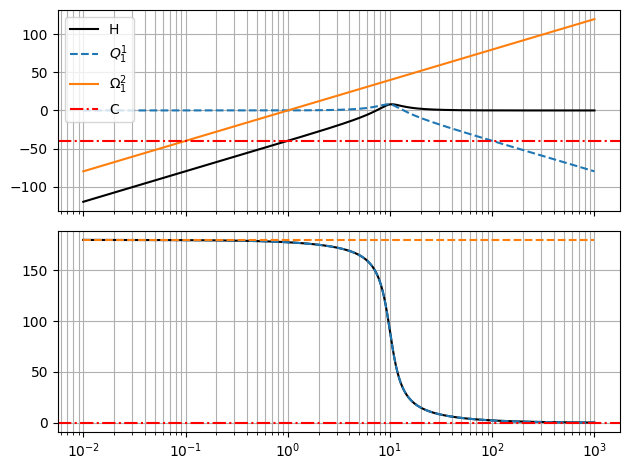

In [117]:
import toolkit as tk
H = s**2/(s**2+4*s+100)
tk.sallenKeyBode([1,0,0], [1,4,100])

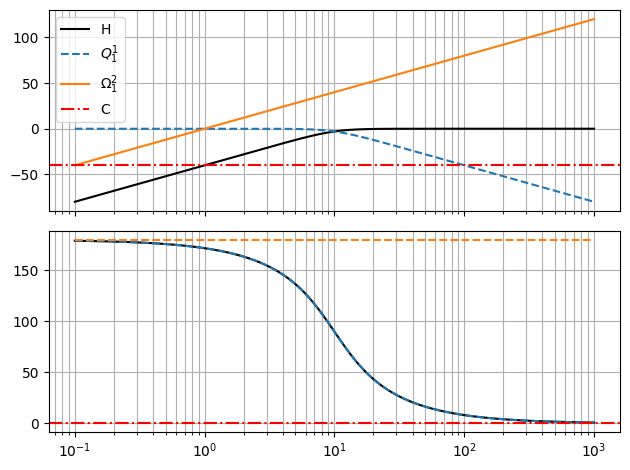

In [119]:
tk.sallenKeyBode([1,0,0], [1,2*sqrt(1/2)*10,100],(-1,3))

In [130]:
u = Heaviside(t)
(integrate(3*exp(-3*(t-tau))*u.subs(t,t-tau)*5*tau*exp(-5*tau)*u.subs(t,tau),(tau,0,t))).expand()

In [143]:
x = exp(-2*t)*Heaviside(t)
w = Symbol('omega', real=True)
(laplace_transform(x.diff(t),t,s)[0].subs(s,j*w)).simplify()

In [146]:
(laplace_transform(x.subs(t,3*t),t,s)[0].subs(s,j*w)).simplify()

In [149]:
(laplace_transform(x*exp(j*3*t),t,s)[0].subs(s,j*w)).collect(j)

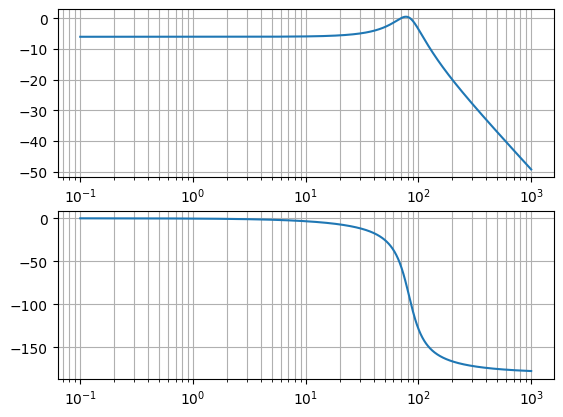

In [2]:
s = Symbol('s')
P = 3400
Q = s**2+40*s+6800
H = P/Q
tk.bode(H)

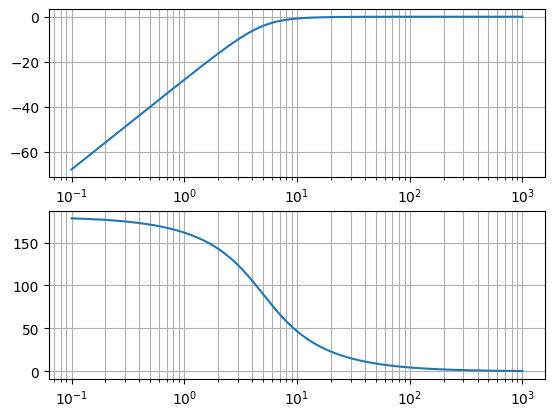

In [3]:
P = s**2
Q = s**2+8*s+25
H = P/Q
tk.bode(H)

In [3]:
s = Symbol('s')
H = s**2/(s**2+8*s+25)
tk.wnDamp(H),tk.pole(H),tk.zeros(H), tk.ROC(H)

$$
\begin{align*}
z_2 &= R_2 & z_1 &= R_1+Z_{C1}=R_1+\frac{1}{Cs}
\end{align*}\\
\begin{align*}
K &= 1+\frac{z_2}{z_1}\\
&= 1+\frac{R_2}{R1+\frac{1}{Cs}}\\
&= 1+ \frac{R_2Cs}{R_1Cs+1}\\
&= 1+ \frac{\frac{R_2}{R_1}s}{s+\frac{1}{R_1C}}\\
&= \frac{(s+\frac{1}{R_1C}) + \frac{R_2}{R_1}s}{s+\frac{1}{R_1C}}\\
K &= \frac{(\frac{R_2}{R_1}+1)s+\frac{1}{R_1C}}{s+\frac{1}{R_1C}}\\
\end{align*}
$$

In [7]:
H = 1/(s**2+6*s+25)
t = Symbol('t', real=True)
tk.step(H)

In [56]:
y = Function('y')
x = Function('x')
ode = diff(y(t),t,2) + 4*diff(y(t),t) + 9*y(t)
ord = ode_order(ode,y)
res = 0
for i in range(ord+1):
    term = 0
    k = ode.coeff(y(t).diff(t,i))
    for j in range(i):
        term += y(t).diff(t,j).subs(t,0)*s**(i-1-j)
    res+=k*term
res.subs({y(0):2,y(t).diff(t).subs(t,0):2})

In [64]:
def settling_time(H,s='s'):
    s = Symbol(s)
    wn,damp = tk.wnDamp(H,s)
    return 4/(damp*wn)

def peak_time(H,s='s'):
    s = Symbol(s)
    wn,damp = tk.wnDamp(H,s)
    return pi/(wn*sqrt(1-damp**2))

def overshoot(H,s='s'):
    s = Symbol(s)
    wn,damp = tk.wnDamp(H,s)
    return 100*exp(-pi*damp/sqrt(1-damp**2))

def rise_time(H,s='s'):
    s = Symbol(s)
    wn,damp = tk.wnDamp(H,s)
    return (1-0.4167*damp+2.917*damp**2)/wn

def delay_time(H,s='s'):
    s = Symbol(s)
    wn,damp = tk.wnDamp(H,s)
    return (1.1+0.125*damp+0.469*damp**2)/wn

def step_info(H,s='s'):
    return {'Overshoot':overshoot(H,s).evalf(),'Peak Time':peak_time(H,s).evalf(),'Settling Time':settling_time(H,s).evalf(),'Rise Time':rise_time(H,s).evalf(),'Delay Time':delay_time(H,s).evalf()}

In [65]:
H = 16/(s**2+2*s+16)
wn, damp = tk.wnDamp(H)
step_info(H)

{'Overshoot': 44.4344225088489,
 'Peak Time': 0.811155735194722,
 'Settling Time': 4.00000000000000,
 'Rise Time': 0.269534375000000,
 'Delay Time': 0.290140625000000}

In [68]:
def sensitivity(y,x):
    return diff(y,x)*x/y

z = Symbol('zeta')
wn = Symbol('omega_n')
wd = wn*sqrt(1-z**2)
sig = -z*wn
sensitivity(sig,z),sensitivity(sig,wn)

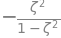

In [71]:
(sensitivity(wd,z))

In [72]:
sensitivity(wd,wn)